Author: **Kibuani Kodasso**  
Date: **10 April 2024**   
Source: **https://www.kaggle.com**   
Github url: **https://github.com/Kodasso/final-assignment.git** 

Some descriptions of this dataset

Fixed acidity: This refers to the concentration of non-volatile acids in the wine.Volatile acidity: 
This measures the amount of acetic acid in the wine, which can cause an unpleasant vinegar tasteCitric acid: 
This is often added to wines to increase acidity, complementing the natural acidity from grapesResidual sugar: .
The amount of sugar remaining in the wine after fermentation, measured in grams per LiteChlorides: r.
The concentration of salt in the wine, also measured in grams per litFree sulfur dioxide: er.
Sulfur dioxide is used as a preservative in winemaking, and the free form is the active form that can protect wine from oxidation and microbial spoilTotal sulfur dioxide: age.
This represents the total amount of sulfur dioxide present in the wine, including both free and bound fDensity: orms.
The density of the wine, typically measured in grams per millipH: liter.
This measures the acidity or basicity of the wine on a scale from 0 to 14, with 7 being nSulphates: eutral.
These are additives that can contribute to the sulfur dioxide levels in wine and also act as antioxidants and antimicrobialAlcohol:  agents.
The percentage of alcohol in the wine bQuality: y volume.
This is the quality rating of the wine, which seems to be on a scale from 1 to 9 in this dataset.ol
Quality

## 1. Data reading and overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy import stats
from scipy.stats import gmean

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality-white.csv')

Let's read the first 5 rows of the dataset

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's read the last 5 rows of the dataset
** Note: the quality of wine varies from 3 to 9.**

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


#### Description of the data

In [5]:
data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
data.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

## 2. Data cleaning

#### Let's check for missing values

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The count is zero meaning that there are no missing values

## 3. Descriptive statistics

### 3.1 Mean 

In [9]:
#Calculating the Mean

print('==========MEAN===========')
means = data.mean()
dataframe = pd.DataFrame({'Mean':means})

dataframe

==========MEAN===========


,Mean
fixed acidity,6.854788
volatile acidity,0.278241
citric acid,0.334192
residual sugar,6.391415
chlorides,0.045772
free sulfur dioxide,35.308085
total sulfur dioxide,138.360657
density,0.994027
pH,3.188267
sulphates,0.489847


### 3.2 Median

In [10]:
#Calculating the Median

print('==========MEDIAN===========')
medians = data.median()
dataframe = pd.DataFrame({'Median':medians})

dataframe

==========MEDIAN===========


,Median
fixed acidity,6.80000
volatile acidity,0.26000
citric acid,0.32000
residual sugar,5.20000
chlorides,0.04300
free sulfur dioxide,34.00000
total sulfur dioxide,134.00000
density,0.99374
pH,3.18000
sulphates,0.47000


### 3.3 Mode

In [11]:
#Calculating the Mode

print('==========MODE===========')
modes = data.apply(lambda x: x.value_counts().idxmax())
dataframe = pd.DataFrame({'Mode':modes})

dataframe

==========MODE===========


,Mode
fixed acidity,6.800
volatile acidity,0.280
citric acid,0.300
residual sugar,1.200
chlorides,0.044
free sulfur dioxide,29.000
total sulfur dioxide,111.000
density,0.992
pH,3.140
sulphates,0.500


### 3.4 Standard Deviation

In [12]:
#Calculating the Standard deviation

print('==========STANDARD DEVIATION===========')
stds = data.std()
dataframe = pd.DataFrame({'Standard deviation':stds})

dataframe

==========STANDARD DEVIATION===========


,Standard deviation
fixed acidity,0.843868
volatile acidity,0.100795
citric acid,0.121020
residual sugar,5.072058
chlorides,0.021848
free sulfur dioxide,17.007137
total sulfur dioxide,42.498065
density,0.002991
pH,0.151001
sulphates,0.114126


### 3.5 Standard Error

In [13]:
#Calculating the Standard error

print('==========STANDARD ERROR===========')
stdError = data.std() / np.sqrt(len(data))
dataframe = pd.DataFrame({'Standard Error':stdError})

dataframe

==========STANDARD ERROR===========


,Standard Error
fixed acidity,0.012058
volatile acidity,0.001440
citric acid,0.001729
residual sugar,0.072473
chlorides,0.000312
free sulfur dioxide,0.243009
total sulfur dioxide,0.607239
density,0.000043
pH,0.002158
sulphates,0.001631


### 3.6 Sample Variance

In [14]:
#Calculating the sample variance

print('==========SAMPLE VARIANCE===========')
sampleV = np.var(data, ddof=1)
dataframe = pd.DataFrame({'Sample Variance':sampleV})

dataframe

==========SAMPLE VARIANCE===========


,Sample Variance
fixed acidity,0.712114
volatile acidity,0.010160
citric acid,0.014646
residual sugar,25.725770
chlorides,0.000477
free sulfur dioxide,289.242720
total sulfur dioxide,1806.085491
density,0.000009
pH,0.022801
sulphates,0.013025


### 3.7 Kurtosis

In [15]:
#Calculating the Kurtosis

print('==========KURTOSIS===========')
kurt = stats.kurtosis(data)
dataframe = pd.DataFrame({'Kurtosis':kurt})

dataframe

==========KURTOSIS===========


,Kurtosis
0,2.168737
1,5.085205
2,6.167374
3,3.465054
4,37.525039
5,11.453416
6,0.570045
7,9.782587
8,0.529009
9,1.588081


### 3.8 Skewness

In [16]:
#Calculating the Skewness

print('==========SKEWNESS===========')
skewness = stats.skew(data)
dataframe = pd.DataFrame({'Skewness':skewness})

dataframe

==========SKEWNESS===========


,Skewness
0,0.647553
1,1.576497
2,1.281528
3,1.076764
4,5.021792
5,1.406314
6,0.390590
7,0.977474
8,0.457642
9,0.976894


### 3.9 Range

In [17]:
#Calculating the Range

print('==========RANGE===========')
ranges = data.max() - data.min()
dataframe = pd.DataFrame({'Range':ranges})

dataframe

==========RANGE===========


,Range
fixed acidity,10.40000
volatile acidity,1.02000
citric acid,1.66000
residual sugar,65.20000
chlorides,0.33700
free sulfur dioxide,287.00000
total sulfur dioxide,431.00000
density,0.05187
pH,1.10000
sulphates,0.86000


### 3.10 Max & Min

In [18]:
#Calculating the Max and Min

print('==========MAX & MIN===========')
maximun = data.max()
minimun = (data).min()
dataframe = pd.DataFrame({'Max':maximun, 'Min':minimun })

dataframe

==========MAX & MIN===========


,Max,Min
fixed acidity,14.20000,3.80000
volatile acidity,1.10000,0.08000
citric acid,1.66000,0.00000
residual sugar,65.80000,0.60000
chlorides,0.34600,0.00900
free sulfur dioxide,289.00000,2.00000
total sulfur dioxide,440.00000,9.00000
density,1.03898,0.98711
pH,3.82000,2.72000
sulphates,1.08000,0.22000


### 3.11 Sum & Count

In [19]:
#Calculating the Sum and Count

print('==========SUM & COUNT===========')
sum_ = data.sum()
count_ = len(data)
dataframe = pd.DataFrame({'Sum':sum_, 'Count':count_ })

dataframe

==========SUM & COUNT===========


,Sum,Count
fixed acidity,33574.75000,4898
volatile acidity,1362.82500,4898
citric acid,1636.87000,4898
residual sugar,31305.15000,4898
chlorides,224.19300,4898
free sulfur dioxide,172939.00000,4898
total sulfur dioxide,677690.50000,4898
density,4868.74609,4898
pH,15616.13000,4898
sulphates,2399.27000,4898


### 3.12 Largest & Smallest

In [20]:
#Calculating the Largest and Smallest

print('==========Largest & Smallest===========')
largest= data.max()
smallest= data.min()
dataframe = pd.DataFrame({'Largest':largest, 'Smallest':smallest })

dataframe

==========Largest & Smallest===========


,Largest,Smallest
fixed acidity,14.20000,3.80000
volatile acidity,1.10000,0.08000
citric acid,1.66000,0.00000
residual sugar,65.80000,0.60000
chlorides,0.34600,0.00900
free sulfur dioxide,289.00000,2.00000
total sulfur dioxide,440.00000,9.00000
density,1.03898,0.98711
pH,3.82000,2.72000
sulphates,1.08000,0.22000


## 4. Let us add more descriptive statistics

### 4.1 Geometric mean
The geometric mean is a measure of central tendency that represents the central or typical value of a dataset.

In [21]:
#calculating the geometric mean
print('==========Geometric Mean===========')
geometric_mean = gmean(data)

dataframe = pd.DataFrame({'Geometric mean':geometric_mean })
dataframe

==========Geometric Mean===========


,Geometric mean
0,6.804126
1,0.262482
2,0.000000
3,4.397022
4,0.042895
5,31.026821
6,131.400478
7,0.994023
8,3.184732
9,0.477520


### 4.2 Percentile

In [22]:
#Calculating 80 percentile
print('==========80 Percentile===========')

percentile_80 = data.quantile(0.8)
dataframe = pd.DataFrame({'Percentile 80':percentile_80 })
dataframe

==========80 Percentile===========


,Percentile 80
fixed acidity,7.5000
volatile acidity,0.3400
citric acid,0.4100
residual sugar,11.2000
chlorides,0.0520
free sulfur dioxide,49.0000
total sulfur dioxide,176.0000
density,0.9968
pH,3.3100
sulphates,0.5700


### 4.3 Quartiles

In [23]:
#calculating the quartile of ODOMETER
Q1 = data.quantile(0.25)  # First quartile (25th percentile)
Q2 = data.quantile(0.5)   # Second quartile (50th percentile) or median
Q3 = data.quantile(0.75)  # Third quartile (75th percentile)

print("===============================================")
print("First quartile (Q1) of the dataset:")
print("===============================================")
dataframe1 = pd.DataFrame({'First quartile':Q1 })
print(dataframe1)
print("===============================================")
print("\nSecond quartile (Q2) or median of the dataset:")
print("===============================================")
dataframe2 = pd.DataFrame({'Second quartile':Q2 })
print(dataframe2)
print("===============================================")
print("\nThird quartile (Q3) of the dataset:")
print("===============================================")
dataframe3 = pd.DataFrame({'Third quartile':Q3 })
print(dataframe3)

First quartile (Q1) of the dataset:
                      First quartile
fixed acidity               6.300000
volatile acidity            0.210000
citric acid                 0.270000
residual sugar              1.700000
chlorides                   0.036000
free sulfur dioxide        23.000000
total sulfur dioxide      108.000000
density                     0.991723
pH                          3.090000
sulphates                   0.410000
alcohol                     9.500000
quality                     5.000000

Second quartile (Q2) or median of the dataset:
                      Second quartile
fixed acidity                 6.80000
volatile acidity              0.26000
citric acid                   0.32000
residual sugar                5.20000
chlorides                     0.04300
free sulfur dioxide          34.00000
total sulfur dioxide        134.00000
density                       0.99374
pH                            3.18000
sulphates                     0.47000
alcohol          

### 4.4 Interquartile Range

It is the difference between the third quartile and the first quartile

In [24]:
Q1 = data.quantile(0.25)  # First quartile (25th percentile)
Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1
print("Interquartile Range (IQR) of the dataset:")
#print(IQR)
dataframe = pd.DataFrame({'IQR':IQR })
dataframe

Interquartile Range (IQR) of the dataset:


,IQR
fixed acidity,1.000000
volatile acidity,0.110000
citric acid,0.120000
residual sugar,8.200000
chlorides,0.014000
free sulfur dioxide,23.000000
total sulfur dioxide,59.000000
density,0.004377
pH,0.190000
sulphates,0.140000


### 4.5 Coefficient of variation

In [25]:
#calculating the Coefficient of variation 
#it is calculated by CV=standard deviation / mean
mean = data.mean()
std_dev = data.std()

CV = std_dev / mean

print("Coefficient of Variation (CV) of the dataset:")

dataframe = pd.DataFrame({'CV':CV })
dataframe

Coefficient of Variation (CV) of the dataset:


,CV
fixed acidity,0.123106
volatile acidity,0.362256
citric acid,0.362127
residual sugar,0.793574
chlorides,0.477318
free sulfur dioxide,0.481678
total sulfur dioxide,0.307154
density,0.003009
pH,0.047361
sulphates,0.232983


### 4.6 Z_Scores

In [26]:
#Calculating the Z_score of ODOMETER
# z_scores = stats.zscore(data['ODOMETER'])
# print(z_scores)
mean = data.mean()
std_dev = data.std()
z_scores = (data - mean) / std_dev
print("Z-scores of the dataset:")
dataframe = pd.DataFrame(z_scores).round(2)
dataframe.head(100)

Z-scores of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.17,-0.08,0.21,2.82,-0.04,0.57,0.74,2.33,-1.25,-0.35,-1.39,0.14
1,-0.66,0.22,0.05,-0.94,0.15,-1.25,-0.15,-0.01,0.74,0.00,-0.82,0.14
2,1.48,0.02,0.54,0.10,0.19,-0.31,-0.97,0.36,0.48,-0.44,-0.34,0.14
3,0.41,-0.48,-0.12,0.42,0.56,0.69,1.12,0.53,0.01,-0.79,-0.50,0.14
4,0.41,-0.48,-0.12,0.42,0.56,0.69,1.12,0.53,0.01,-0.79,-0.50,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.29,-0.18,-0.37,1.18,-0.08,1.57,2.39,0.96,-0.98,-0.61,-1.07,0.14
96,-1.01,0.61,2.69,1.87,0.01,-0.55,0.60,1.29,-0.32,0.09,-1.39,0.14
97,2.07,-0.13,0.21,-1.02,-0.54,-1.19,-1.37,-0.91,-1.58,-1.14,0.72,1.27
98,3.49,0.81,1.04,0.81,-0.36,-1.84,-1.30,0.53,-1.98,-1.66,-0.34,-2.12


### 4.7 Chebyshev's theorem

In [27]:
# Calculate the mean and standard deviation
mean = data.mean()
std_dev = data.std()

# Apply Chebyshev's theorem
k = 2
proportion_lower_bound = 1 - 1 / (k**2)
print(f"According to Chebyshev's theorem, at least {proportion_lower_bound:.2f} of the data in each column falls within {k} standard deviations of the mean.")


According to Chebyshev's theorem, at least 0.75 of the data in each column falls within 2 standard deviations of the mean.


### 4.8 Five number Summary
This consists of:    
The minimun value   
The maximun value      
The three quartiles  

In [28]:
#Calculating the Five number summaru of ODOMETER
min_values = data.min()
Q1 = data.quantile(0.25)
median = data.median()
Q3 = data.quantile(0.75)
max_values = data.max()

print("============================================")
print("Five-number summary of the dataset:")
print("============================================")
print("Minimum values:")
print(min_values)
print("============================================")
print("\nFirst quartile (Q1):")
print("============================================")
print(Q1)
print("============================================")
print("\nMedian (Q2):")
print("============================================")
print(median)
print("============================================")
print("\nThird quartile (Q3):")
print("============================================")
print(Q3)
print("============================================")
print("\nMaximum values:")
print("============================================")
print(max_values)

Five-number summary of the dataset:
Minimum values:
fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     2.00000
total sulfur dioxide    9.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
dtype: float64

First quartile (Q1):
fixed acidity             6.300000
volatile acidity          0.210000
citric acid               0.270000
residual sugar            1.700000
chlorides                 0.036000
free sulfur dioxide      23.000000
total sulfur dioxide    108.000000
density                   0.991723
pH                        3.090000
sulphates                 0.410000
alcohol                   9.500000
quality                   5.000000
Name: 0.25, dtype: float64

Median (Q2):
fixed acidity             6.80000
volatile acidity          0.2600

### 4.9 Mid range
mid range is the sum of the max and min values divided by 2 

In [29]:
#calculating the midrange
min_values = data.min()
max_values = data.max()
mid_range = (min_values + max_values) / 2

print("Mid-range of the dataset:")
dataframe = pd.DataFrame({'Mid-range': mid_range })
dataframe

Mid-range of the dataset:


,Mid-range
fixed acidity,9.000000
volatile acidity,0.590000
citric acid,0.830000
residual sugar,33.200000
chlorides,0.177500
free sulfur dioxide,145.500000
total sulfur dioxide,224.500000
density,1.013045
pH,3.270000
sulphates,0.650000


### 4.10 Sum of squares
The sum of squares (SS) is the sum of the squared differences between each data point and the mean of the dataset.

In [30]:
#Calculating the sum of squares
sum_of_squares = ((data - mean) ** 2).sum()
dataframe = pd.DataFrame({'SS': sum_of_squares })
dataframe

,SS
fixed acidity,3.487220e+03
volatile acidity,4.975127e+01
citric acid,7.172045e+01
residual sugar,1.259791e+05
chlorides,2.337503e+00
free sulfur dioxide,1.416422e+06
total sulfur dioxide,8.844401e+06
density,4.380623e-02
pH,1.116574e+02
sulphates,6.378199e+01


### 4.11 Box plot

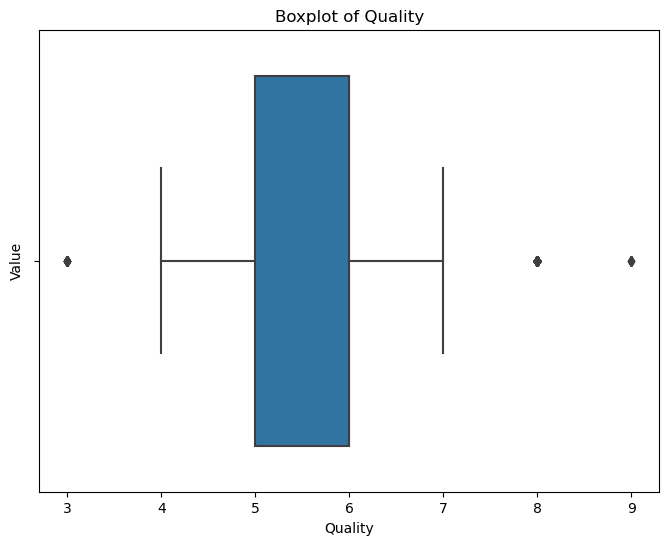

In [31]:
# Boxplot for 'quality'
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', data=data)
plt.title('Boxplot of Quality')
plt.xlabel('Quality')
plt.ylabel('Value')
plt.show()

## Graphs

the below code for this section  will generate histograms for all numerical variables, a pairplot for pairwise relationships, a correlation heatmap, a violin plot of alcohol content by quality, and a bar plot showing the distribution of quality ratings in your dataset.

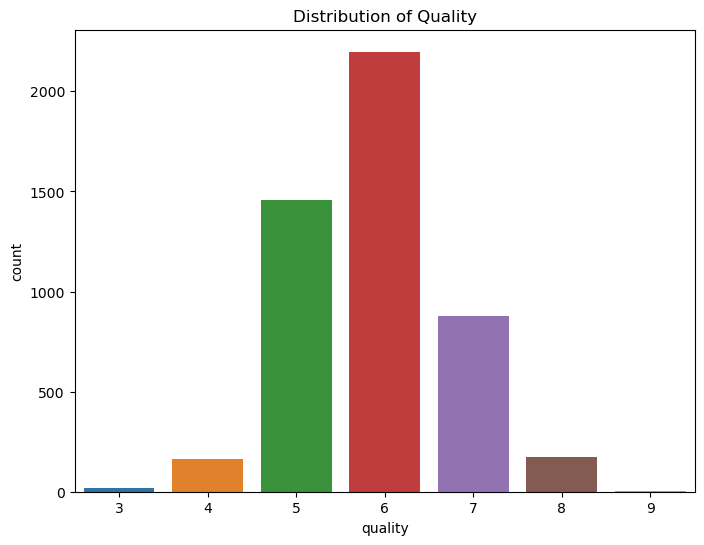

In [32]:

# Bar plot (example assuming 'quality' is a categorical variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Quality')
plt.show()

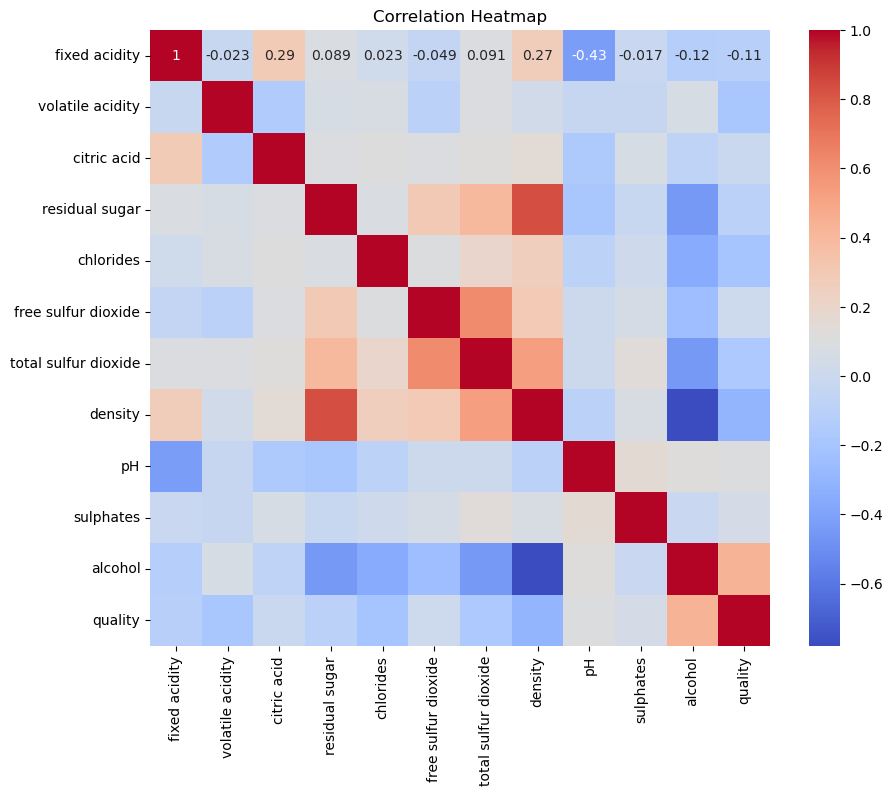

In [33]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

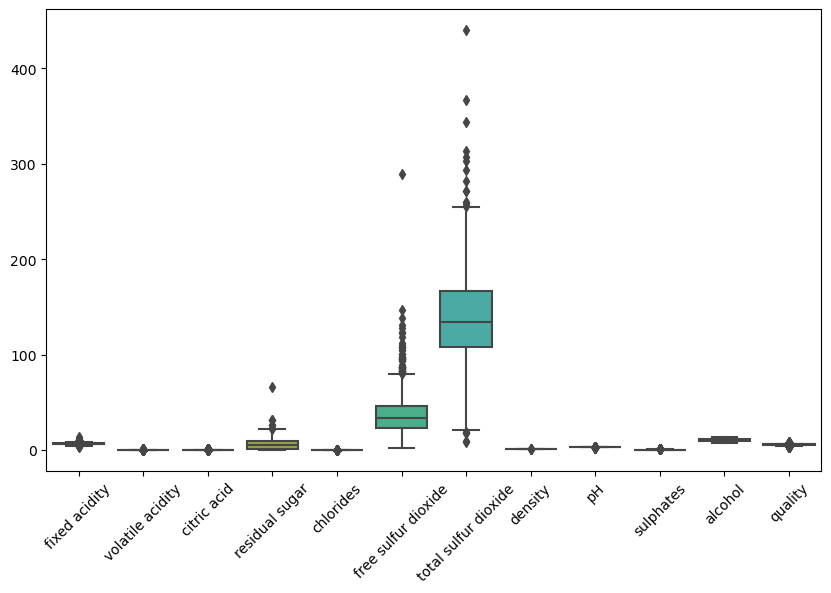

In [34]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

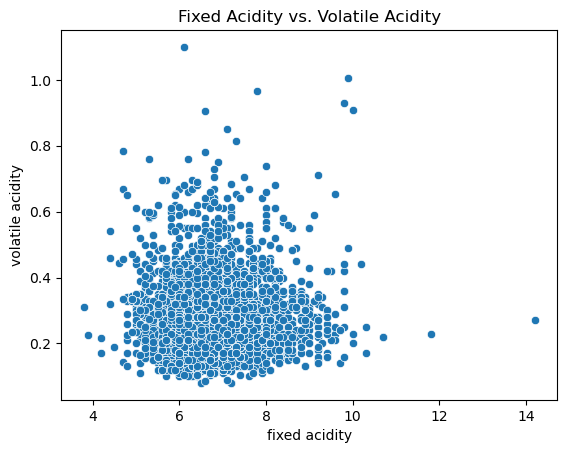

In [35]:
# Scatter plot
sns.scatterplot(x='fixed acidity', y='volatile acidity', data=data)
plt.title('Fixed Acidity vs. Volatile Acidity')
plt.show()

In [ ]:
# Pairplot
sns.pairplot(data)
plt.show()

In [ ]:
# Histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Histograms for numerical variables
plt.figure(figsize=(12, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [ ]:
# Violin plot for 'quality'
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=data)
plt.title('Violin Plot of Alcohol Content by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

In [ ]:
# Scatter plot for 'residual sugar' vs 'density'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='residual sugar', y='density', data=data)
plt.title('Scatter Plot of Residual Sugar vs Density')
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.show()

## 6. Reflection 

I have learned a lot about the distinctions and parallels between Python and Excel by working on tasks in both Jupyter Notebooks and Excel. When working with non-technical individuals and small to medium-sized datasets, Excel is especially helpful. It is also a popular business tool that makes reporting and data sharing easy. With respect to scalability and versatility, Python is a more flexible programming language than Excel. With the use of libraries like Pandas, NumPy, and Matplotlib, it can handle massive datasets with ease and facilitate the development of unique functions and sophisticated data processing.

Whichever one I would employ, depending on the circumstances. For instance, Python's strength is its capacity for intricate analysis, task automation, and system integration and Excel can be a useful tool for quick data analysis and reporting

Additionally, investing time in mastering advanced Excel functionalities, particularly Power Query and Power Pivot, would streamline my data analysis process within the application.

To address these data analysis gaps, the key is to learn Python fundamentals and then actively engage with real-world projects using Python